# 1η Εργαστηριακή Άσκηση - Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

Ονοματεπώνυμο: Αποστολία Χρυσοβαλάντου Σκέντζου

Αριθμός μητρώου: 03120054

# 1. Θεωρητικό Μέρος



**α) Πώς η τιμή του α επηρεάζει την γκαουσιανή πυραμίδα;**

Η τιμή της παραμέτρου α καθορίζει τη μορφή του generating kernel που χρησιμοποιείται στη δημιουργία της Gaussian πυραμίδας. Καθώς το α αυξάνεται, το φίλτρο συγκεντρώνεται περισσότερο στο κεντρικό pixel, μειώνοντας τη συμβολή των γειτονικών pixels και άρα περιορίζοντας το φαινόμενο της εξομάλυνσης (blurring). Αντίθετα, μικρότερες τιμές του α οδηγούν σε πιο «απλωμένο» φίλτρο, ενισχύοντας τη συμβολή των γειτόνων και αυξάνοντας τη θόλωση της εικόνας. Τιμές γύρω στο 0.4–0.5 παράγουν φίλτρα παρόμοια με μια κανονική κατανομή, τα οποία θεωρούνται βέλτιστα για Gaussian smoothing.

**β) Τι ορίζουμε ως εντροπία; Υπολογίστε τη μέγιστη τιμή εντροπίας που μπορεί να έχει μια grayscale εικόνα**

Η εντροπία ,σύμφωνα με το paper που μας δόθηκε, μετρά την ποσότητα πληροφορίας ανά pixel, δηλαδή πόσα bits/pixel χρειάζονται κατ' ελάχιστο για να κωδικοποιηθεί η εικόνα χωρίς απώλειες. Για να υπολογίσουμε την μέγιστη εντροπία για τις grayscale εικόνες θα χρησιμοποιήσουμε τον τύπο:
$$
H = - \sum_{i=0}^{n} f(i) \cdot \log_2 f(i)
$$
Αφού στις grayscale εικόνες έχουμε 256 δυνατές τιμές γκρίζου (0-255) η μέγιστη τιμή της εντροπίας θα ισχύει όταν όλες οι τιμές είναι ισοπίθανες με πιθανότητα f(i) = 1/256. Αναλυτικά, υπολογίζουμε:

$$
H_{max} = - \sum_{i=0}^{255} \frac{1}{256} \cdot \log_2 \left( \frac{1}{256} \right) = -256 \cdot \frac{1}{256} \cdot (-8) = 8 \ \text{bits/pixel}
$$

**γ) Πώς η επιλογή του μεγέθους του bin επηρεάζει το αποτέλεσμα του κβαντισμού;**

Το μέγεθος του bin στον κβαντισμό επηρεάζει την ισορροπία μεταξύ ποιότητας και συμπίεσης. Μικρά bins προσφέρουν υψηλή ακρίβεια αλλά λιγότερη συμπίεση, ενώ μεγαλύτερα bins αυξάνουν τη συμπίεση με κόστος πιθανής απώλειας λεπτομέρειας. Άλλωστε αφού η επιλογή αντιπροσώπου για κάθε bin γίνεται σε σχέση με την μέση τιμή του bin, η επιλογή του μεγέθους θα έχει άμεση επίδραση στο οπτικό αποτέλεσμα της εικόνας.

**δ) Εξηγήστε πώς επηρεάζεται η κβάντιση από το πλήθος των επιπέδων της πυραμίδας.**

Καθώς αυξάνεται το πλήθος των επιπέδων της πυραμίδας, η κβάντιση μπορεί να
προσαρμοστεί καλύτερα σε κάθε επίπεδο. Τα υψηλότερα επίπεδα (χαμηλότερης ανάλυσης) απαιτούν λεπτότερη κβάντιση λόγω οπτικής ευαισθησίας, το ανθρώπινο μάτι είναι πιο ευαίσθητο στις χαμηλές και μεσαίες συχνότητες, ενώ τα χαμηλότερα επίπεδα (υψηλές συχνότητες) μπορούν να κβαντιστούν πιο χονδρικά χωρίς εμφανή παραμόρφωση.

---



# 2. Εργαστηριακό Μέρος





Σε αυτό το μέρος της εργαστηριακής άσκησης θα υλοποιήσουμε τις συναρτήσεις που μας ζητήθηκαν.

In [150]:
import numpy as np

# Α. Υλοποίηση αλγορίθμου

**Υλοποίηση GKernel function:**

Υλοποιούμε το διάνυσμα μεγέθους 5x1 που θα δημιουργήσει το generative kernel σύμφωνα με τις εξισώσεις που αναλύθηκαν στο paper που μας δόθηκε.

In [151]:
def GKernel(a):
    # Creates a 1D symmetric Gaussian-like generating kernel based on parameter 'a'
    w = np.array([
        (1/4 - a/2),
        (1/4),
        a,
        (1/4),
        (1/4 - a/2)
    ])

    # 5x5 Gaussian-like filter
    h = np.outer(w, w)

    return h


**Υλοποίηση GREDUCE function**

In [152]:
from scipy.signal import convolve2d

In [153]:
# Convolution of the generative kernel with the processing image and then downsamples the image keeping 1 after 2 pixels in each direction -> 1/4 of initial image
# Function is illustrated to work both for grayscale and RGB images

def GREDUCE(I, h):
    if I.ndim == 2:  # Grayscale
        blurred = convolve2d(I, h, mode='same', boundary='symm')
        I_out = blurred[::2, ::2]
        return I_out
    else:  # RGB image
        reduced_channels = []
        for c in range(I.shape[2]):
            blurred = convolve2d(I[:, :, c], h, mode='same', boundary='symm')
            reduced = blurred[::2, ::2]
            reduced_channels.append(reduced)
        I_out = np.stack(reduced_channels, axis=2)
        return I_out


**Υλοποίηση GPyramid function**

In [154]:
# repeats the process of Gaussian filtering and downsampling for as many times as the number of levels specified for the Gaussian Pyramid
# returns the processed image for each level of the gaussian pyramid in a list

def GPyramid(I, a, depth):
    G = [I]  #initial image g0
    h = GKernel(a)

    current = I
    for i in range(depth):
        current = GREDUCE(current, h)
        G.append(current)

    return G


**Υλοποίηση GEXPAND function**

In [155]:
# Expands the size of the image by 2 in each dimension filling up with zero valued pixels and then applies the Gaussian generative kernel
# Function is illustrated to work both for grayscale and RGB images

def GEXPAND(I, h):
    def expand_channel(channel):
        H, W = channel.shape
        expanded = np.zeros((2 * H, 2 * W), dtype=np.float32)
        expanded[::2, ::2] = channel
        out = convolve2d(expanded, h, mode='same', boundary='symm')
        return out * 4

    if I.ndim == 2:  # Grayscale
        I_out = expand_channel(I)
        return I_out
    else:  # RGB image
        expanded_channels = [expand_channel(I[:, :, c]) for c in range(I.shape[2])]
        I_out = np.stack(expanded_channels, axis=2)
        return I_out


**Υλοποίηση Lpyramid function**

In [156]:
# Creates Laplacian pyramid via substracting the images of corresponding levels of the gaussian images after they are expanded
# Returns the list of processed images on each level of the Laplacian Pyramid

def LPyramid(I, a, depth):
    G = GPyramid(I, a, depth)
    h = GKernel(a)
    L = []

    for i in range(depth):
        g_curr = G[i]
        g_next_expanded = GEXPAND(G[i + 1], h)

        # edge case
        if g_next_expanded.shape != g_curr.shape:
            g_next_expanded = g_next_expanded[:g_curr.shape[0], :g_curr.shape[1]]

        L.append(g_curr - g_next_expanded) # create layer of laplacian pyramid

    # Ln = gn, last level of the Laplacian stays as is
    L.append(G[-1])

    return L


**Υλοποίηση L_Pyramid_Decode function**

In [157]:
# returns the initial image by adding up all laplacian level images after expansion

def L_Pyramid_Decode(L, a):
    h = GKernel(a)
    depth = len(L) - 1
    I_out = L[-1]  # start from the top level of the pyramid

    for i in reversed(range(depth)):
        I_out = GEXPAND(I_out, h)

        # shape if needed
        if I_out.shape != L[i].shape:
            I_out = I_out[:L[i].shape[0], :L[i].shape[1]]

        I_out = I_out + L[i] # add up Laplacian pyramid layers

    return I_out


**Υλοποίηση L_Quantization function**

In [158]:
# Performs quantification process to images listed in L woth the bin_size given

def L_Quantization(L, bin_size):
    L_q = []
    for L_l in L:
        # This reduces the number of distinct values -> better compression
        L_q.append(np.round(L_l / bin_size) * bin_size)

    return L_q



---



# Β. Δοκιμές Αλγορίθμου

## `1. Έλεγχος συναρτήσεων L_Pyramid και L_Pyramid_Decode`



Ξεκινάμε από την φόρτωση των εικόνων, τις οποίες θα επεξεργαστούμε για να διαπιστώσουμε την ορθότητα των συναρτήσεων που υλοποιήσαμε στο προηγούμενο μέρος τηε εργαστηριακής άσκησης. Θα φορτώσουμε λοιπόν τις εικόνες Lena και camera. Προκειμένου να γίνει εμφανές πως οι συναρτήσεις δουλέυουν τόσο για μονόχρωμες (grayscale) όσο και για έχρωμες εικόνες (RGB), θα φορτώσουμε την φωτογραφία της Lena σε έγχρωμη μορφή.

In [159]:
import urllib.request
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data

# load camera picture
camera = data.camera().astype(np.float32)

# load Lena picture
url = 'http://www.image.ntua.gr/~tpar/LABimage/lena.png'
HTTP_response = urllib.request.urlopen(url)
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr, -1)
lena= cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB).astype(np.float32)

*Σημειώνεται πως αφού οι φωτογραφίες φορ΄τώθηκαν σε μορφή float32, προκειμένου να γίνει αποδοτικότερα η επεξεργασία τους και αργότερα θα τα μετατρέπουμε σε uint8 για την παρουσίαση των εικόνων.*

In [160]:
def compute_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')  # no error -> psnr is infinite
    PIXEL_MAX = 255.0
    psnr = 10 * np.log10((PIXEL_MAX ** 2) / mse)
    return psnr


In [161]:
# randomly selecting a and depth values, based on info given in the paper
alpha = 0.5
depth = 4

images = [("Lena", lena), ("Camera", camera)]

test_reconstructed = {}
test_errors = {}
test_psnr = {}

for name, image in images:
    print(f"\n--- Image: {name} ---")

    # Laplacian Pyramid contruction and decoding
    L = LPyramid(image, alpha, depth)
    rec = L_Pyramid_Decode(L, alpha)

    # compute error and psnr
    error =  np.mean(np.abs(image - rec))
    psnr = compute_psnr(image, rec)

    print(f"α = {alpha:.1f} → ΜSE: {error:.6f} | PSNR: {psnr:.2e} dB")

    test_reconstructed[name] = rec
    test_errors[name] = error
    test_psnr[name] = psnr



--- Image: Lena ---
α = 0.5 → ΜSE: 0.000000 | PSNR: inf dB

--- Image: Camera ---
α = 0.5 → ΜSE: 0.000000 | PSNR: inf dB


Χρησιμοποιούμε τις μετρικές του Μέσου Τετραγωνικού Σφάλματος (MSE) και του PSNR για να αξιολογήσουμε την ποιότητα ανακατασκευής των εικόνων.

α = 0.3 → MSE: 0.000000 | PSNR: inf dB


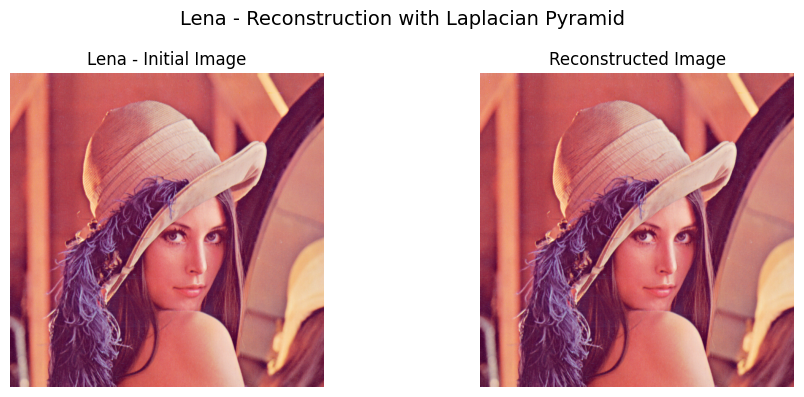

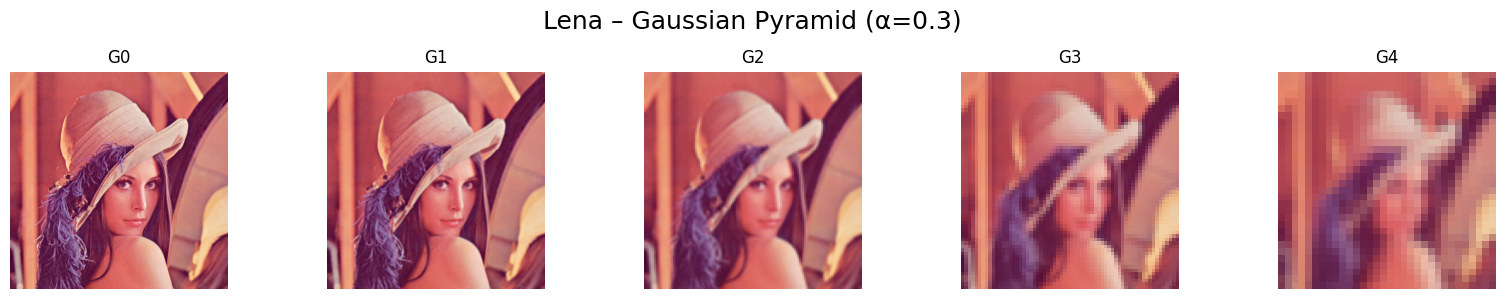

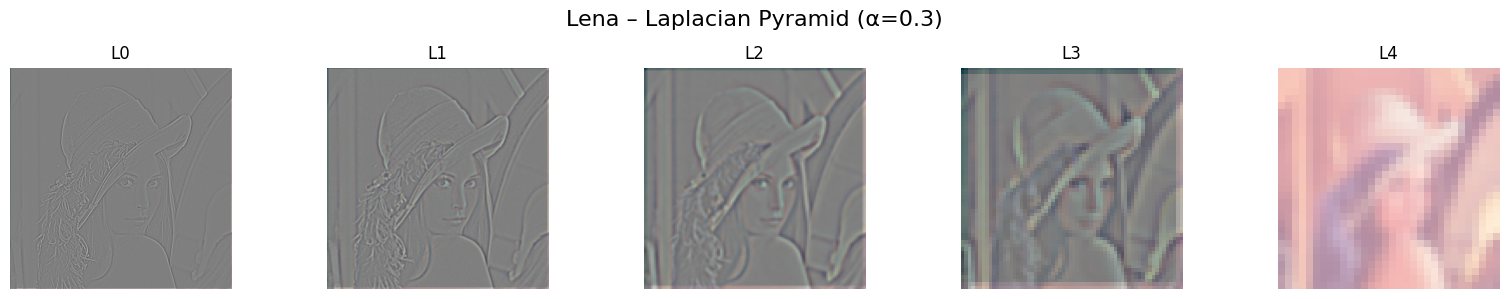


α = 0.3 → MSE: 0.000000 | PSNR: inf dB


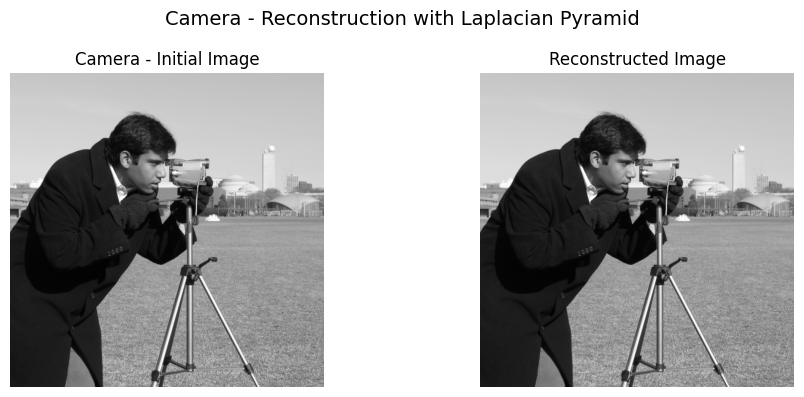

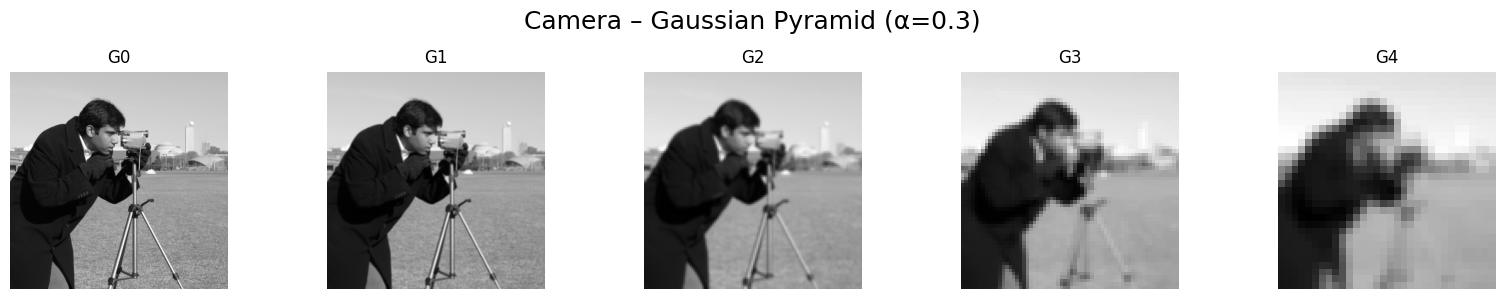

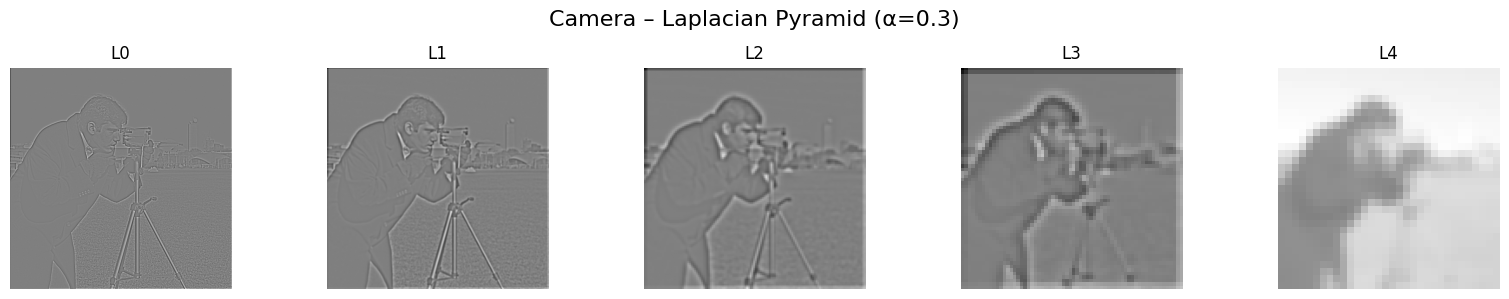

In [162]:
for name, image in images:
    rec = test_reconstructed[name]
    err = test_errors[name]
    psnr = test_psnr[name]

    alpha = 0.3

    print(f"α = {alpha:.1f} → MSE: {err:.6f} | PSNR: {psnr:.2f} dB")

    # Υπολογισμός πυραμίδων
    G = GPyramid(image, alpha, depth)
    L = LPyramid(image, alpha, depth)

    # Απεικόνιση Αρχικής & Ανακατασκευασμένης
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image.astype(np.uint8), cmap='gray' if image.ndim == 2 else None)
    plt.title(f'{name} - Initial Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(rec.astype(np.uint8), cmap='gray' if rec.ndim == 2 else None)
    plt.title('Reconstructed Image')
    plt.axis('off')

    plt.suptitle(f'{name} - Reconstruction with Laplacian Pyramid', fontsize=14)
    plt.tight_layout()
    plt.show()

    # print gaussian pyramid for each image
    plt.figure(figsize=(16, 3))
    for i, g in enumerate(G):
        plt.subplot(1, len(G), i + 1)
        plt.imshow(g.astype(np.uint8), cmap='gray' if g.ndim == 2 else None)
        plt.title(f'G{i}')
        plt.axis('off')

    plt.suptitle(f'{name} – Gaussian Pyramid (α={alpha})', fontsize=18)
    plt.tight_layout()
    plt.show()

    # print laplacian pyramid for each image
    plt.figure(figsize=(16, 3))

    for i, l in enumerate(L):
        plt.subplot(1, len(L), i + 1)

        if l.ndim == 2:  # Grayscale
            A = np.max(np.abs(l))
            plt.imshow(l, cmap='gray', vmin=-A, vmax=A)

        elif l.ndim == 3:  # RGB
            A = np.max(np.abs(l))
            l_norm = np.clip(l, -A, A)
            l_norm = (l_norm + A) / (2 * A)
            plt.imshow(l_norm)

        plt.title(f"L{i}")
        plt.axis('off')

    plt.suptitle(f"{name} – Laplacian Pyramid (α={alpha})", fontsize=16)
    plt.tight_layout()
    plt.show()


    print()


**Παρατηρήσεις:**
Ο έλεγχος των συναρτήσεων L_Pyramid και L_Pyramid_Decode έδειξε ότι η ανακατασκευασμένη εικόνα ταυτίζεται οπτικά και αριθμητικά με την αρχική, με σχεδόν μηδενικό σφάλμα (MSE ≈ 0). Αυτό επιβεβαιώνει ότι η διαδικασία ανάλυσης και σύνθεσης μέσω της Laplacian πυραμίδας είναι πλήρως αντιστρέψιμη (lossless), όταν δεν εφαρμόζεται καμία επιπλέον παραμόρφωση όπως κβαντισμός. Αποτελεί ένδειξη ότι η υλοποίηση είναι ορθή και ότι διατηρείται ακέραια η πληροφορία της εικόνας.

# `2. Πειραματισμός με διαφορετικές τιμές της παραμέτρου α του kernel`

In [127]:
# testing alpha values in range [0.3, 0.7]
alpha_values = [0.3, 0.4, 0.5, 0.6, 0.7]
depth = 4 # keeping the same value for depth for all the tests

a_reconstructed = {}
a_errors = {}
a_psnr = {}
a_laplacian_levels = {}

for name, image in images:
    print(f"\n--- Image: {name} ---")
    reconstructed_images = []
    errors = []
    psnr_values = []
    laplacians_per_alpha = []

    for a in alpha_values:
        # Create Laplacian Pyramid
        L = LPyramid(image, a, depth)

        # keeping all the levels of the pyramid
        laplacians_per_alpha.append(L)

        rec = L_Pyramid_Decode(L, a)

        # calculate mse and psnr
        error = np.mean((image - rec) ** 2)
        psnr = compute_psnr(image, rec)

        reconstructed_images.append(rec)
        errors.append(error)
        psnr_values.append(psnr)

        print(f"α = {a:.1f} → MSE: {error:.2e} | PSNR: {psnr:.2f} dB")

    a_reconstructed[name] = reconstructed_images
    a_errors[name] = errors
    a_psnr[name] = psnr_values
    a_laplacian_levels[name] = laplacians_per_alpha



--- Image: Lena ---
α = 0.3 → MSE: 0.00e+00 | PSNR: inf dB
α = 0.4 → MSE: 0.00e+00 | PSNR: inf dB
α = 0.5 → MSE: 0.00e+00 | PSNR: inf dB
α = 0.6 → MSE: 4.21e-35 | PSNR: 391.88 dB
α = 0.7 → MSE: 2.89e-33 | PSNR: 373.52 dB

--- Image: Camera ---
α = 0.3 → MSE: 0.00e+00 | PSNR: inf dB
α = 0.4 → MSE: 0.00e+00 | PSNR: inf dB
α = 0.5 → MSE: 0.00e+00 | PSNR: inf dB
α = 0.6 → MSE: 1.02e-34 | PSNR: 388.06 dB
α = 0.7 → MSE: 1.06e-32 | PSNR: 367.86 dB


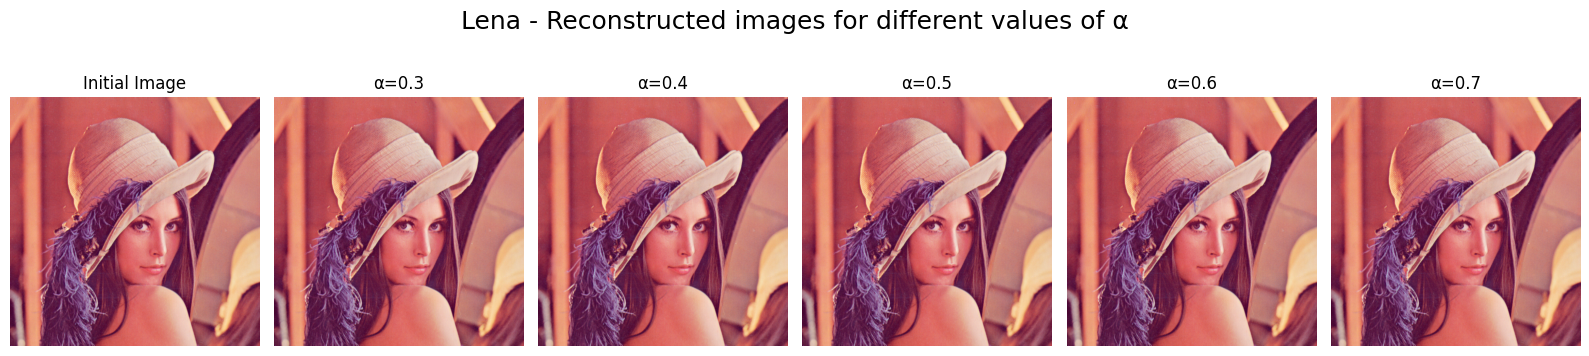

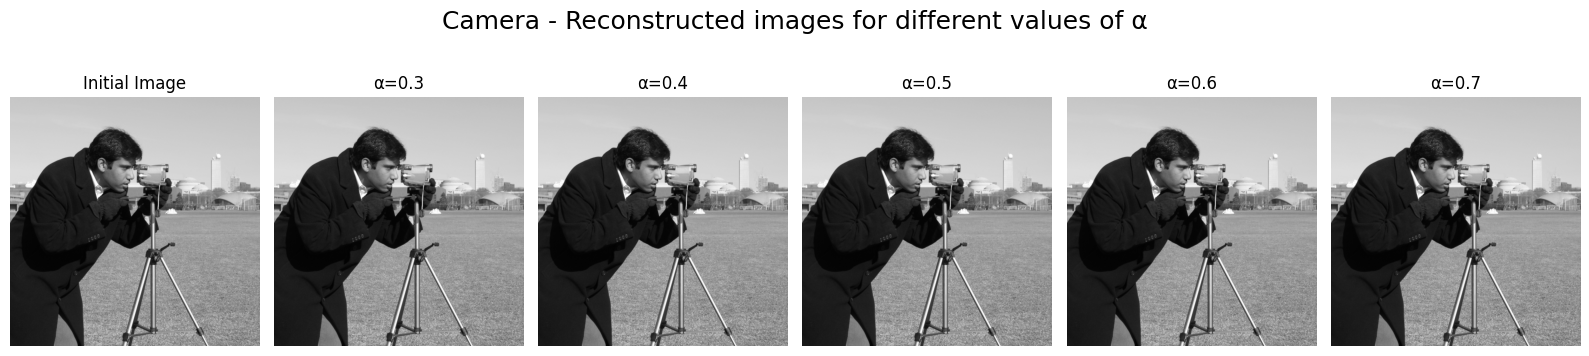

In [128]:
for name, image in images:
    recs = a_reconstructed[name]
    errs = a_errors[name]
    psnrs = a_psnr[name]

    plt.figure(figsize=(16, 4))

    # Initial Image
    plt.subplot(1, len(alpha_values) + 1, 1)
    if image.ndim == 2:
        plt.imshow(image.astype(np.uint8), cmap='gray')
    else:
        plt.imshow(image.astype(np.uint8))
    plt.title(f'Initial Image')
    plt.axis('off')

    # Resctructed images for each aplha value
    for i, (a, rec) in enumerate(zip(alpha_values, recs), start=2):
        plt.subplot(1, len(alpha_values) + 1, i)
        if rec.ndim == 2:
            plt.imshow(rec.astype(np.uint8), cmap='gray')
        else:
            plt.imshow(rec.astype(np.uint8))
        plt.title(f'α={a}')
        plt.axis('off')

    plt.suptitle(f'{name} - Reconstructed images for different values of α', fontsize=18)
    plt.tight_layout()
    plt.show()
    print()


**Παρατηρήσεις:** Σύμφωνα με τη θεωρία, η παράμετρος α επηρεάζει τη μορφή του kernel και τον τρόπο κατασκευής της πυραμίδας. Ωστόσο, τα πειραματικά αποτελέσματα έδειξαν πως για τιμές α από 0.3 έως 0.7, η ανακατασκευή είναι ουσιαστικά lossless, με μηδενικά ή αμελητέα σφάλματα (MSE ≈ 0, PSNR → ∞) και χωρίς οπτική αλλοίωση. Αυτό επιβεβαιώνει την αντιστρεψιμότητα της Laplacian πυραμίδας ανεξάρτητα από την επιλογή του α.

Από τις τιμές των σφαλμάτων επίσης παρατηρούμε πως για μεγαλύτερες τιμές της παραμέτρου το MSE αρχίζει σταδιακά να αυξάνεται, παρότι παραμένει σε χαμηλές τιμές. Αυτό συβαίνει γιατί, καθώς αυξάνεται η παράμετρος α, το generating kernel γίνεται πιο "επιπεδωμένο", μειώνοντας την επίδραση των γειτονικών pixels στη φιλτραρισμένη εικόνα. Αυτό οδηγεί σε λιγότερο αποτελεσματική εξομάλυνση πριν το downsampling, γεγονός που επιτρέπει την εμφάνιση μικρών αριθμητικών σφαλμάτων κατά την ανακατασκευή, λόγω aliasing, εξηγώντας τη μικρή αλλά σταδιακή αύξηση του MSE.

Παρακάτω παραθέτουμε για εποπτικούς λόγους τα διαγράματα συσχέτισηw της παραμέτρου α με το MSE και το PSNR:

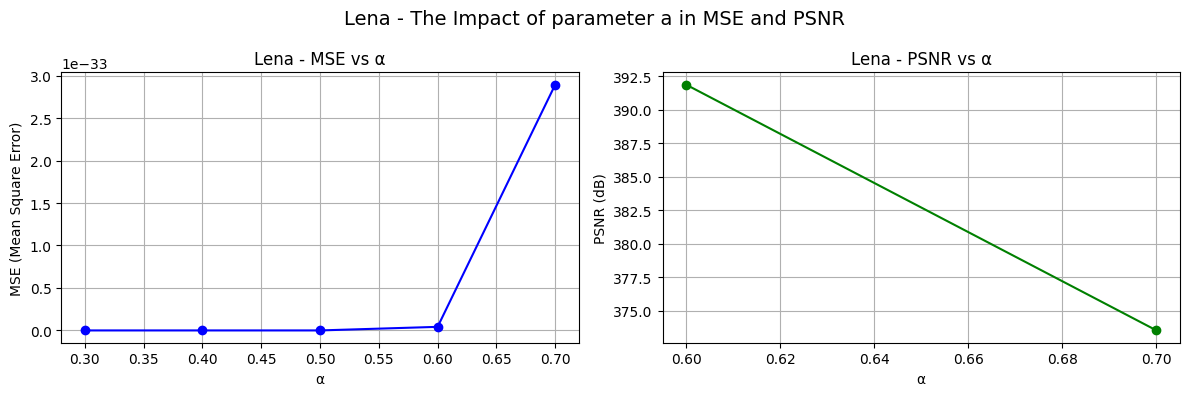

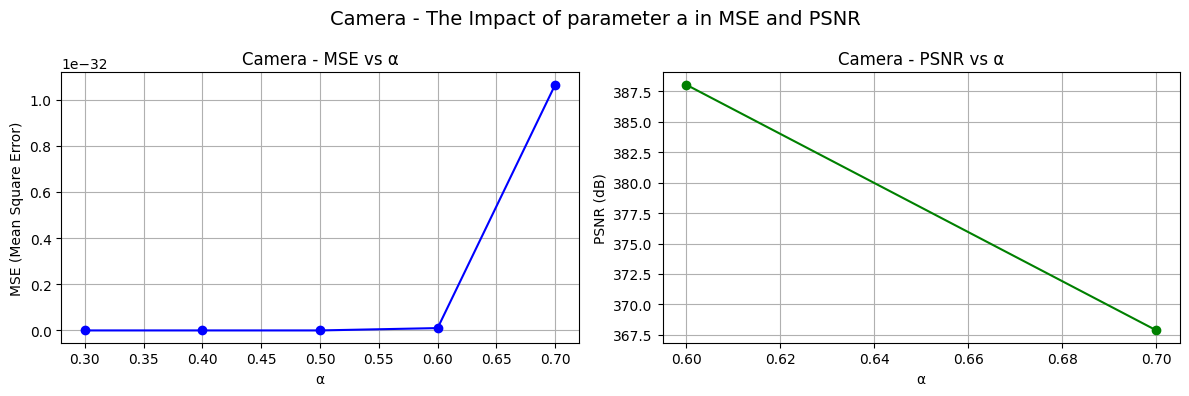

In [129]:
for name in a_errors:
    mae = a_errors[name]
    psnr = a_psnr[name]

    plt.figure(figsize=(12, 4))

    # MSE diagram
    plt.subplot(1, 2, 1)
    plt.plot(alpha_values, mae, marker='o', color='blue')
    plt.title(f"{name} - MSE vs α")
    plt.xlabel("α")
    plt.ylabel("MSE (Mean Square Error)")
    plt.grid(True)

    # PSNR Diagram
    plt.subplot(1, 2, 2)
    plt.plot(alpha_values, psnr, marker='o', color='green')
    plt.title(f"{name} - PSNR vs α")
    plt.xlabel("α")
    plt.ylabel("PSNR (dB)")
    plt.grid(True)

    plt.suptitle(f"{name} - The Impact of parameter a in MSE and PSNR", fontsize=14)
    plt.tight_layout()
    plt.show()


Τα παραπάνω διαγράμματα επιβεβαιώνουν τα συμπεράσματα που αναφέραμε παραπάνω. Η συμπεριφορά αυτή του σφάλματος σε τιμές α μεγαλύτερες του 0.5 ήταν σχετικά αναμενόμενη, σύμφωνα με τα διαγράμματα που παρουσιάστηκαν στο paper (fig.3: shape of equivalent weighting function dependinf of the choice of the parameter a). Συγκεκριμένα, βλέπουμε πως για τιμές α>0.5 η κατανομή δεν προσομοιάζει ποια την Gaussian και εμφανίζει όλο και περισσότερες ανωμαλείες και spikes.



# `3. Πειραματισμός με διαφορετικές τιμές της παραμέτρου depth για τις Πυραμίδες`

Σε αυτό το σημείο της εργαστηριακής άσκησης θα δοκιμάσουμε διαφορετικές τιμές για την παράμετρο depth της πυραμίδας.

In [130]:
# depth values tested will be in range [3,6]
depth_values = [3, 4, 5, 6]
a = 0.4  # gaussian-like equivalent weighting function

depth_reconstructed = {}
depth_errors = {}
depth_psnr = {}
depth_laplacian_levels = {}

for name, image in images:
    print(f"\n--- Image: {name} ---")
    reconstructed_images = []
    errors = []
    psnr_values = []
    laplacians_per_depth = []

    for depth in depth_values:
        L = LPyramid(image, a, depth)
        rec = L_Pyramid_Decode(L, a)

        error = np.mean((image - rec) ** 2)
        psnr = compute_psnr(image, rec)

        reconstructed_images.append(rec)
        errors.append(error)
        psnr_values.append(psnr)
        laplacians_per_depth.append(L)

        print(f"depth = {depth} → MSE: {error:.2e} | PSNR: {psnr:.2f} dB")

    depth_reconstructed[name] = reconstructed_images
    depth_errors[name] = errors
    depth_psnr[name] = psnr_values
    depth_laplacian_levels[name] = laplacians_per_depth



--- Image: Lena ---
depth = 3 → MSE: 0.00e+00 | PSNR: inf dB
depth = 4 → MSE: 0.00e+00 | PSNR: inf dB
depth = 5 → MSE: 0.00e+00 | PSNR: inf dB
depth = 6 → MSE: 0.00e+00 | PSNR: inf dB

--- Image: Camera ---
depth = 3 → MSE: 0.00e+00 | PSNR: inf dB
depth = 4 → MSE: 0.00e+00 | PSNR: inf dB
depth = 5 → MSE: 0.00e+00 | PSNR: inf dB
depth = 6 → MSE: 0.00e+00 | PSNR: inf dB


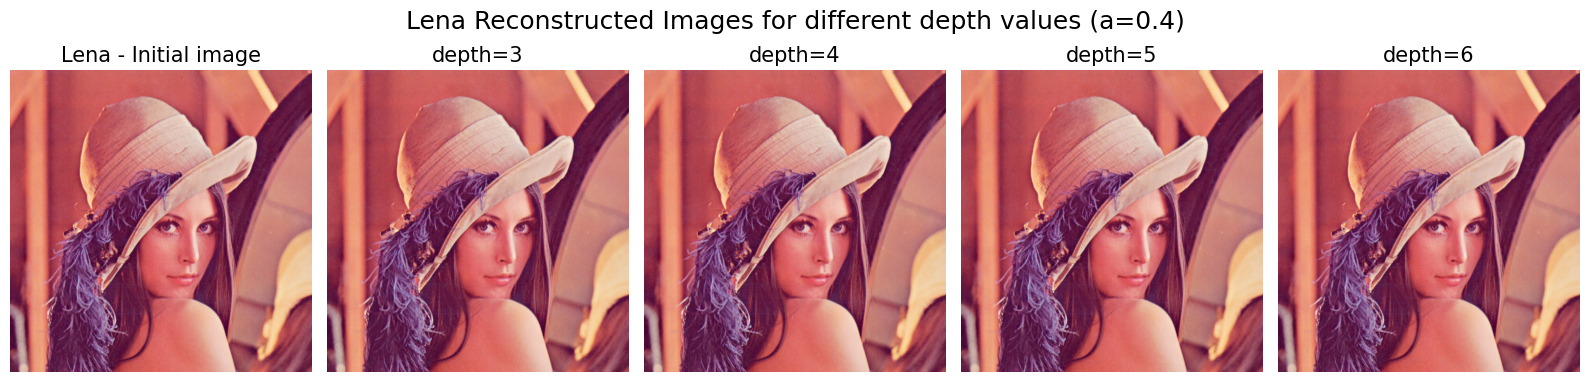

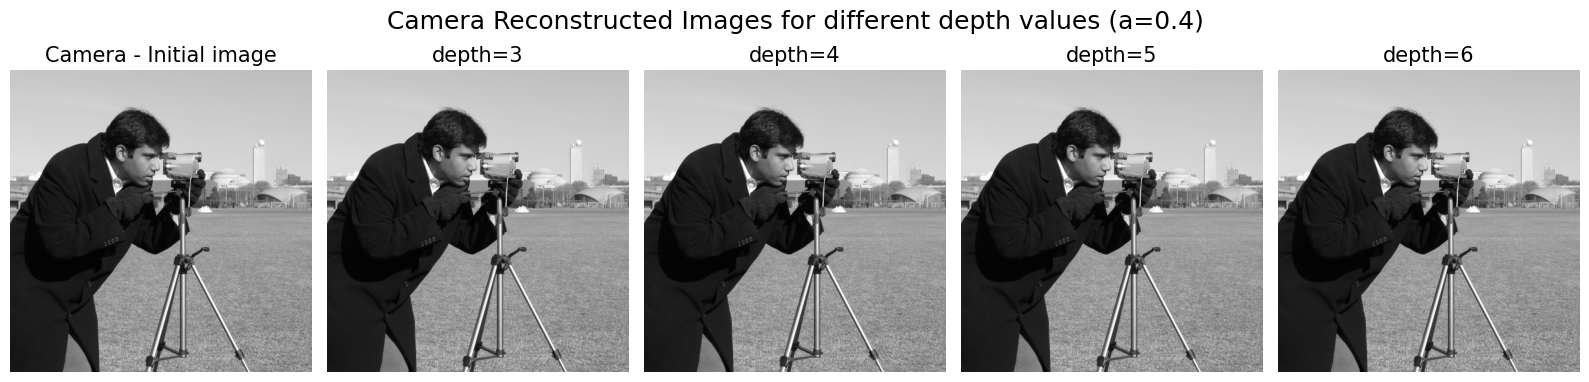

In [131]:
for name, image in images:
    recs = depth_reconstructed[name]
    errs = depth_errors[name]
    psnrs = depth_psnr[name]

    plt.figure(figsize=(16, 4))

    #   Initial image
    plt.subplot(1, len(depth_values) + 1, 1)
    if image.ndim == 2:
        plt.imshow(image.astype(np.uint8), cmap='gray')
    else:
        plt.imshow(image.astype(np.uint8))
    plt.title(f'{name} - Initial image', fontsize = 15)
    plt.axis('off')

    # Recunstructed image for each depth value
    for i, (d, rec) in enumerate(zip(depth_values, recs), start=2):
        plt.subplot(1, len(depth_values) + 1, i)
        if rec.ndim == 2:
            plt.imshow(rec.astype(np.uint8), cmap='gray')
        else:
            plt.imshow(rec.astype(np.uint8))
        plt.title(f'depth={d}', fontsize = 15)
        plt.axis('off')

    plt.suptitle(f'{name} Reconstructed Images for different depth values (a={a})', fontsize=18)
    plt.tight_layout()
    plt.show()


**Παρατηρήσεις:** Η μεταβολή του αριθμού επιπέδων της Laplacian πυραμίδας (depth) δεν επηρεάζει το σφάλμα ανακατασκευής, καθώς η διαδικασία LPyramid και L_Pyramid_Decode είναι πλήρως αντιστρέψιμη. Σε κάθε επίπεδο, αποθηκεύονται οι πληροφορίες που χάνονται λόγω του subsampling, όπως αναφέραμε και προηγουμένως. Εφόσον δεν εφαρμόζεται απώλεια πληροφορίας (π.χ. κβαντισμός), η ανακατασκευή παραμένει αριθμητικά ακριβής ανεξαρτήτως του βάθους της πυραμίδας, όπως φαίνεται και από τα μηδενικά MSE και τα άπειρα PSNR σε όλα τα πειράματα αλλά και από τις ανασκευασμένες εικόνες παραπάνω.
Τα μηδενικά σφάλματα οφείλονται στην επιλογή κατάλληλης τιμής για την παράμετρο α, ωστόσο παρατηρούμε πως το σφάλμα αυτό παραμένει σταθερό ανεξάρτητα από τις τιμές του depth.

Φυσικά, όσο αυξάνουμε τον αριθμό των επιπέδων στην πυραμίδα έχουμε όλο και πιο αφαιρετικές αναπαρστάσεις της εικόνας.

Για εποπτικούς λόγους θα παραθέσουμε πάλι τα διαγράμματα συσχέτισης της μεταβλητής depth με το MSE και PSNR. Αναμένουυμε φυσικά στο διάγραμμα του PSNR να μην εμφανίζεται τιμή αφού η τιμή του απειρίζεται για όλες τις τιμές του depth, όπως καταγράφηκε παραπάνω.

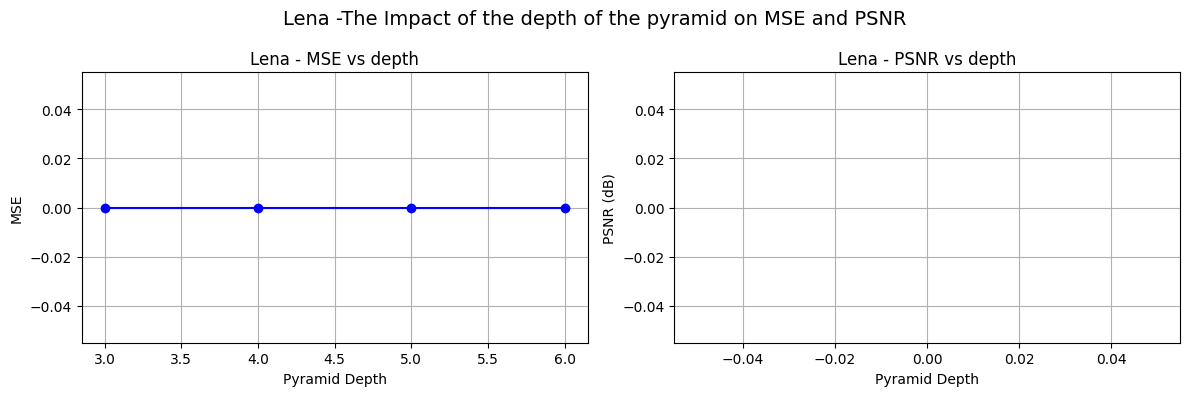

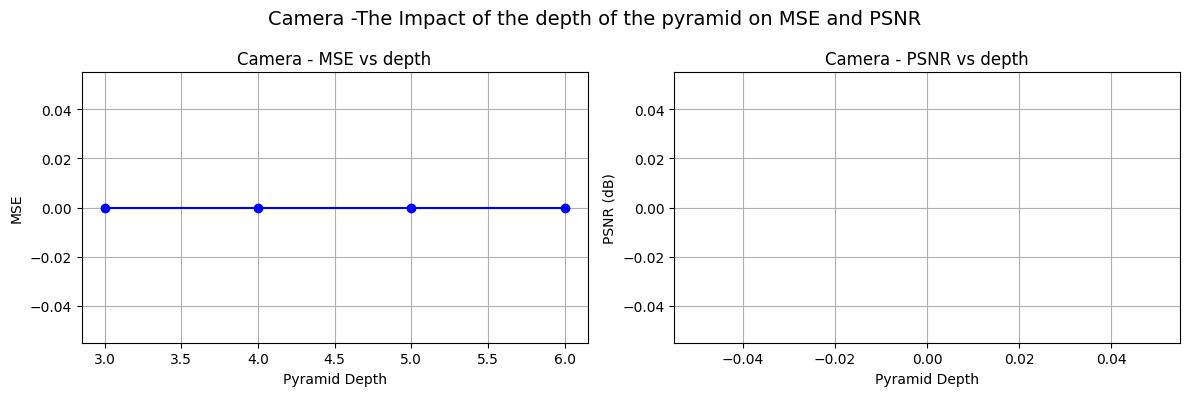

In [132]:
for name in depth_errors:
    mse = depth_errors[name]
    psnr = depth_psnr[name]

    plt.figure(figsize=(12, 4))

    # MSE vs depth
    plt.subplot(1, 2, 1)
    plt.plot(depth_values, mse, marker='o', color='blue')
    plt.title(f"{name} - MSE vs depth")
    plt.xlabel("Pyramid Depth")
    plt.ylabel("MSE")
    plt.grid(True)

    # PSNR vs depth
    plt.subplot(1, 2, 2)
    plt.plot(depth_values, psnr, marker='o', color='green')
    plt.title(f"{name} - PSNR vs depth")
    plt.xlabel("Pyramid Depth")
    plt.ylabel("PSNR (dB)")
    plt.grid(True)

    plt.suptitle(f"{name} -The Impact of the depth of the pyramid on MSE and PSNR", fontsize=14)
    plt.tight_layout()
    plt.show()


Τα διαγράμματα αυτά επιβεβαιώνουν πως η παράμετρος depth δεν επηρεάζει την ανακατασκευή της εικόνας.

# 4. Εντροπία

Θα υπολογίσουμε τώρα την εντροπία και θα παρουσιάσουμε τα αντίστοιχα διαγράμματα για τις διάφορες τιμές του a και του depth που εξετάσαμε προηγουμένως υπολογισμένα για κάθε επίπεδο της laplacian πυραμίδας.

Πριν προχωρήσουμε στον υπολογισμό της εντροπίας, θεωρούμε χρήσιμη την παρουσίαση των ιστογραμμάτων των δύο εικόνων, καθώς μας προσφέρουν μια πιο άμεση και οπτική κατανόηση της κατανομής των τιμών έντασης των pixels.

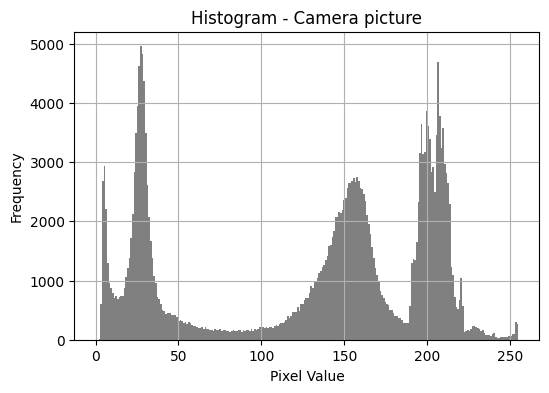

In [133]:
plt.figure(figsize=(6, 4))
plt.hist(camera.ravel(), bins=256, range=(0, 255), color='gray')
plt.title("Histogram - Camera picture")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Για την έγχρωμη φωτογραφία της Lena θεωρούμε χρήσιμο να παραθέσουμε 3 ιστογράμματα, ένα για κάθε κανάλι της εικόνας (Red, Green, Blue).

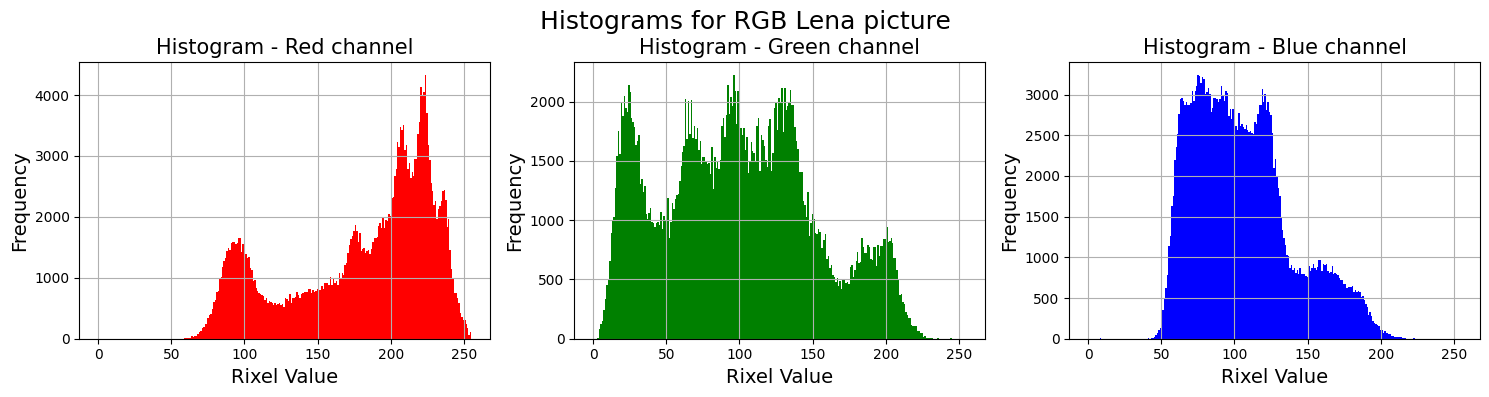

In [134]:
import matplotlib.pyplot as plt

channels = ['Red', 'Green', 'Blue']
colors = ['red', 'green', 'blue']

plt.figure(figsize=(15, 4))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.hist(lena[:, :, i].ravel(), bins=256, range=(0, 255), color=colors[i])
    plt.title(f"Histogram - {channels[i]} channel", fontsize=15)
    plt.xlabel("Rixel Value", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Histograms for RGB Lena picture", fontsize=18)
plt.subplots_adjust(top=0.85)
plt.show()


Θα παρουσιάσουμε τώρα τα διαγράμματα για την εντροπία πoυ υπολογίζεται στις επεξεργασμένες εικόνες κάθε επιπέδου της Laplacian pyramid σε σχέση με τις διαφορετικές τιμές του α και του depth.

In [135]:
from scipy.stats import entropy as scipy_entropy
import numpy as np

def compute_entropy_scipy(image):
    if image.dtype != np.uint8:
        img_min = np.min(image)
        img_max = np.max(image)

        if img_max == img_min:
            return 0.0

        image = ((image - img_min) / (img_max - img_min) * 255).astype(np.uint8)

    # compute histogram
    hist, _ = np.histogram(image.flatten(), bins=256, range=(0, 256), density=False)

    # normilization
    probs = hist / np.sum(hist)
    probs = probs[probs > 0]

    return scipy_entropy(probs, base=2)


**Παράμετρος α**

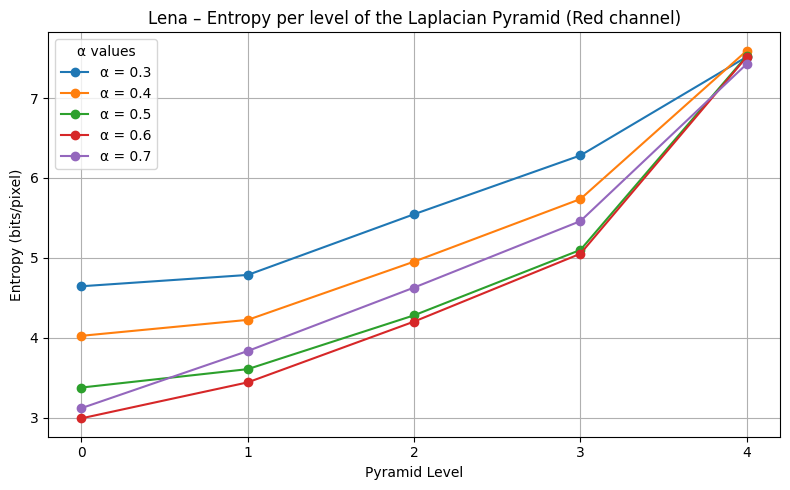

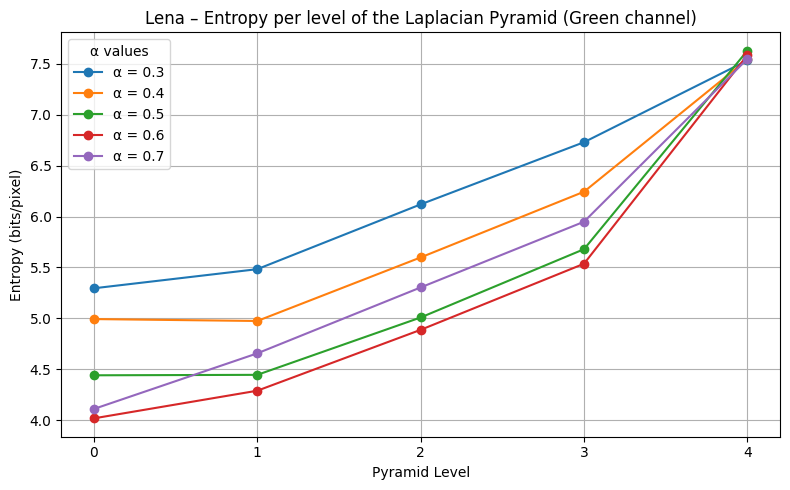

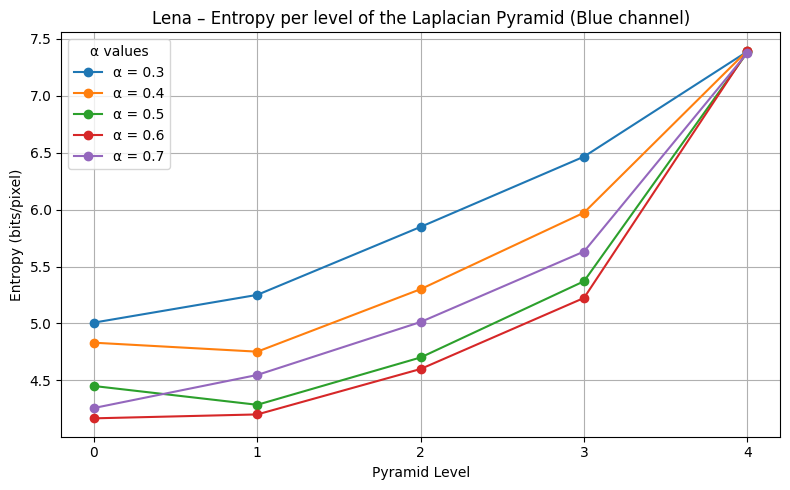

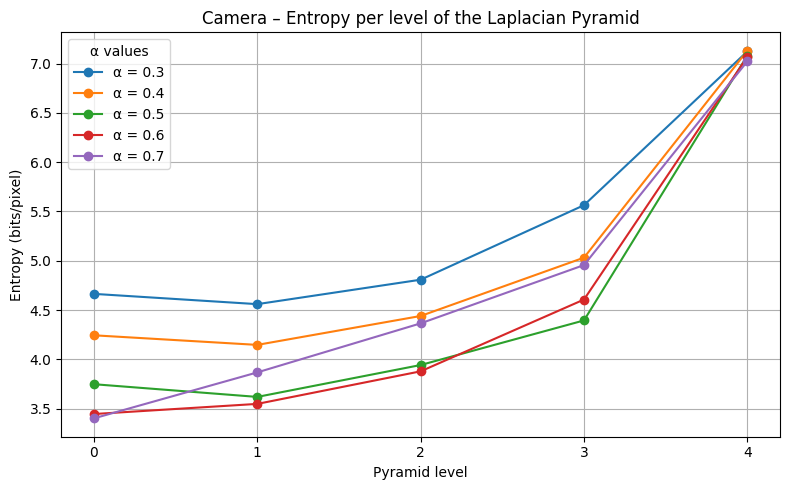

In [136]:
channels = ['Red', 'Green', 'Blue']

# calculation of entropy per level of the pyramid
for name in a_laplacian_levels:
    img = a_laplacian_levels[name][0][0]

    if img.ndim == 2:  # Grayscale
        a_entropy_per_level = []
        for i, a in enumerate(alpha_values):
            L_pyr = a_laplacian_levels[name][i]
            level_entropies = [compute_entropy_scipy(level_img) for level_img in L_pyr]
            a_entropy_per_level.append(level_entropies)

        # Plot για grayscale
        plt.figure(figsize=(8, 5))
        for i, a in enumerate(alpha_values):
            y = a_entropy_per_level[i]
            x = list(range(len(y)))
            plt.plot(x, y, marker='o', label=f"α = {a}")

        plt.title(f"{name} – Entropy per level of the Laplacian Pyramid")
        plt.xlabel("Pyramid level")
        plt.ylabel("Entropy (bits/pixel)")
        plt.xticks(range(len(y)))
        plt.legend(title="α values")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    elif img.ndim == 3:  # RGB
        # calculate entropy separetly fpr each RGB channel
        a_entropy_rgb_per_level = {ch: [] for ch in channels}

        for ch_index, ch_name in enumerate(channels):
            entropies_per_alpha = []

            for i, a in enumerate(alpha_values):
                L_pyr = a_laplacian_levels[name][i]
                level_entropies = []

                for level_img in L_pyr:
                    ch_data = level_img[:, :, ch_index]
                    H = compute_entropy_scipy(ch_data)
                    level_entropies.append(H)

                entropies_per_alpha.append(level_entropies)

            a_entropy_rgb_per_level[ch_name] = entropies_per_alpha

        for ch_name in channels:
            plt.figure(figsize=(8, 5))
            entropies_per_alpha = a_entropy_rgb_per_level[ch_name]

            for i, a in enumerate(alpha_values):
                y = entropies_per_alpha[i]
                x = list(range(len(y)))
                plt.plot(x, y, marker='o', label=f"α = {a}")

            plt.title(f"{name} – Entropy per level of the Laplacian Pyramid ({ch_name} channel)")
            plt.xlabel("Pyramid Level")
            plt.ylabel("Entropy (bits/pixel)")
            plt.xticks(range(len(y)))
            plt.legend(title="α values")
            plt.grid(True)
            plt.tight_layout()
            plt.show()


Για καλύτερα εποπτικά αποτελέσματα θα παρουσιάσουμε διάγραμμα εξάρτησης της μέσης εντροπίας κάθε εικόνας σε σχέση με τις διαφορετικές τιμές του α.

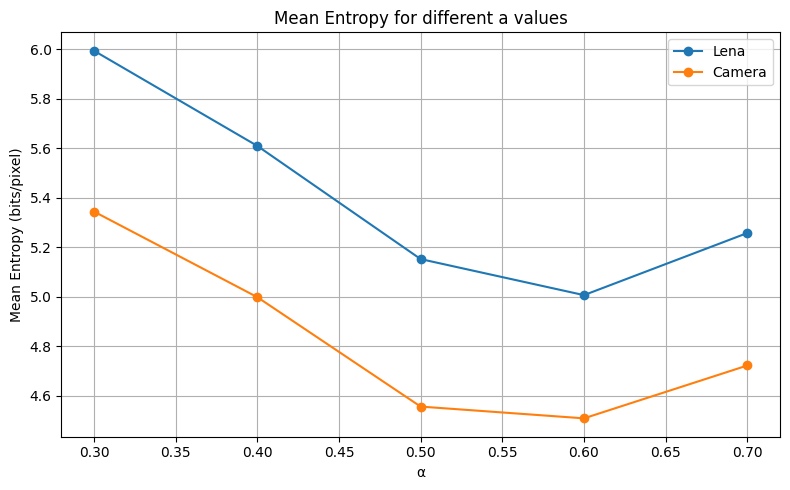

In [137]:
mean_entropies_by_alpha = {}

for name in a_laplacian_levels:
    img = a_laplacian_levels[name][0][0]
    entropies = []

    for i, a in enumerate(alpha_values):
        L_pyr = a_laplacian_levels[name][i]

        if img.ndim == 2:  # Grayscale
            level_entropies = [compute_entropy_scipy(level) for level in L_pyr]
            mean_entropy = np.mean(level_entropies)

        elif img.ndim == 3:  # RGB
            per_level = []
            for level in L_pyr:
                ch_entropies = [compute_entropy_scipy(level[:, :, c]) for c in range(3)]
                per_level.append(np.mean(ch_entropies))
            mean_entropy = np.mean(per_level)

        entropies.append(mean_entropy)

    mean_entropies_by_alpha[name] = entropies

# Πλοτ
plt.figure(figsize=(8, 5))
for name, entropies in mean_entropies_by_alpha.items():
    plt.plot(alpha_values, entropies, marker='o', label=name)

plt.title("Mean Entropy for different a values")
plt.xlabel("α")
plt.ylabel("Mean Entropy (bits/pixel)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Παρατηρήσεις:** Όπως φαίνεται στα διαγράμματα, η εντροπία των εικόνων της Laplacian πυραμίδας επηρεάζεται από την τιμή της παραμέτρου α, κυρίως στα χαμηλότερα επίπεδα. Παρατηρείται ότι τα αρχικά επίπεδα της πυραμίδας εμφανίζουν χαμηλότερη εντροπία, ενώ στα ανώτερα επίπεδα η εντροπία αυξάνεται. Το φαινόμενο αυτό είναι αναμενόμενο: στα χαμηλά επίπεδα διατηρείται περισσότερη πληροφορία από την αρχική εικόνα και οι διαφορές μεταξύ των επιπέδων της Gaussian πυραμίδας είναι μικρές, άρα και πιο προβλέψιμες. Αντίθετα, στα υψηλότερα επίπεδα η εικόνα έχει υποστεί περισσότερη εξομάλυνση και υποδειγματοληψία, γεγονός που αυξάνει την αβεβαιότητα στις διαφορές και, κατ’ επέκταση, την εντροπία.
---



**Παράμετρος Depth**

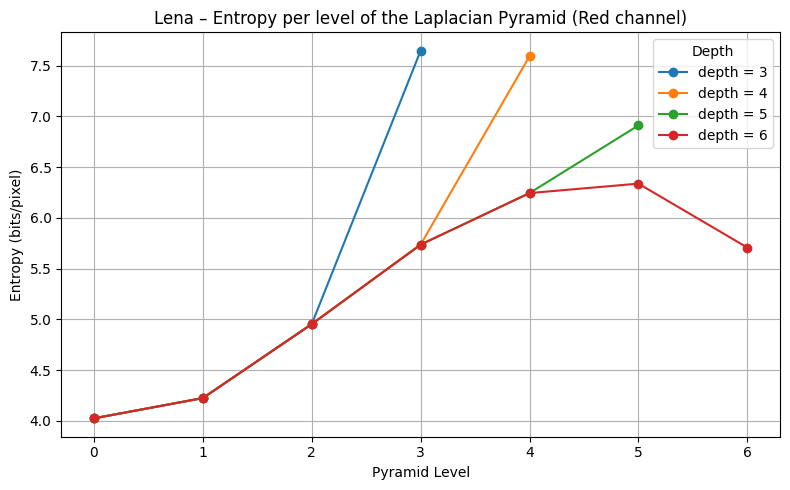

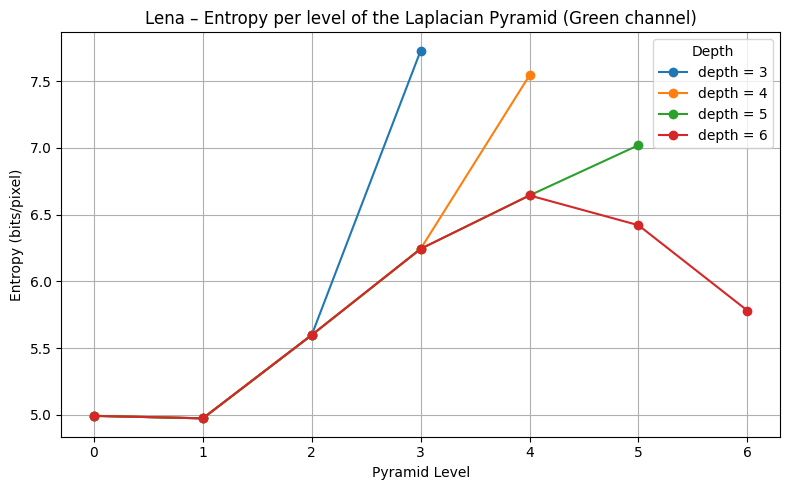

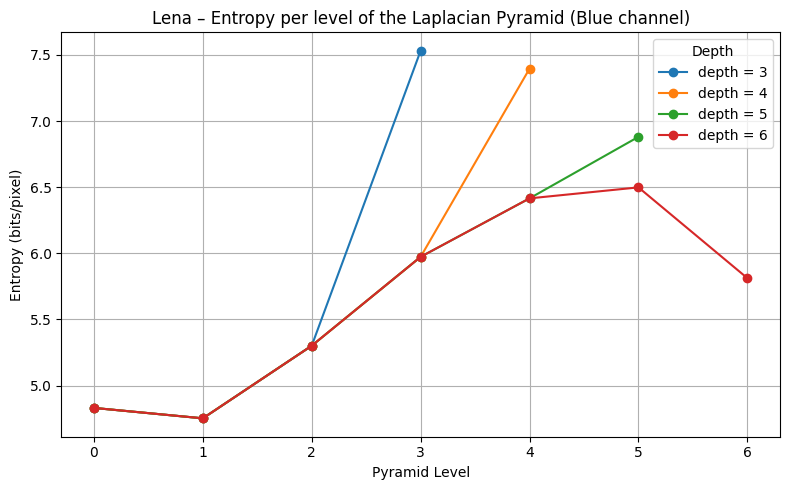

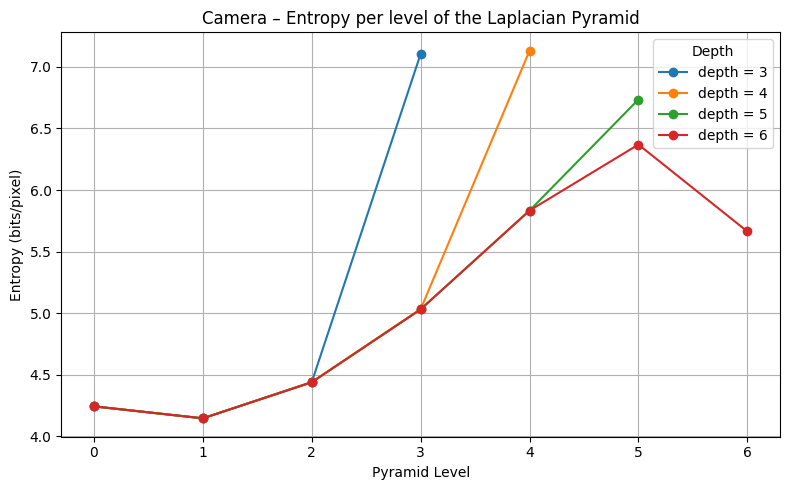

In [138]:

for name in depth_laplacian_levels:
    img = depth_laplacian_levels[name][0][0]

    if img.ndim == 2:  # Grayscale
        depth_entropy_per_level = []

        for i, depth in enumerate(depth_values):
            L_pyr = depth_laplacian_levels[name][i]
            level_entropies = [compute_entropy(level_img) for level_img in L_pyr]
            depth_entropy_per_level.append(level_entropies)

        # grayscale
        plt.figure(figsize=(8, 5))
        for i, depth in enumerate(depth_values):
            y = depth_entropy_per_level[i]
            x = list(range(len(y)))
            plt.plot(x, y, marker='o', label=f"depth = {depth}")

        plt.title(f"{name} – Entropy per level of the Laplacian Pyramid")
        plt.xlabel("Pyramid Level")
        plt.ylabel("Entropy (bits/pixel)")
        plt.xticks(range(len(y)))
        plt.legend(title="Depth")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    elif img.ndim == 3:  # RGB
        depth_entropy_rgb_per_level = {ch: [] for ch in channels}

        for ch_index, ch_name in enumerate(channels):
            for i, depth in enumerate(depth_values):
                L_pyr = depth_laplacian_levels[name][i]
                level_entropies = []

                for level_img in L_pyr:
                    ch_data = level_img[:, :, ch_index]
                    H = compute_entropy(ch_data)
                    level_entropies.append(H)

                depth_entropy_rgb_per_level[ch_name].append(level_entropies)

        # Plot ανά κανάλι
        for ch_name in channels:
            plt.figure(figsize=(8, 5))
            for i, depth in enumerate(depth_values):
                y = depth_entropy_rgb_per_level[ch_name][i]
                x = list(range(len(y)))
                plt.plot(x, y, marker='o', label=f"depth = {depth}")

            plt.title(f"{name} – Entropy per level of the Laplacian Pyramid ({ch_name} channel)")
            plt.xlabel("Pyramid Level")
            plt.ylabel("Entropy (bits/pixel)")
            plt.xticks(range(len(y)))
            plt.legend(title="Depth")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

**Πρατηρήσεις:** Στα διαγράμματα που παρουσιάζονται, αποτυπώνεται η μεταβολή της εντροπίας ανά επίπεδο για διαφορετικά βάθη της Laplacian πυραμίδας. Παρατηρείται ότι, για κάθε βάθος, το ανώτερο (coarsest) επίπεδο εμφανίζει τη μεγαλύτερη τιμή εντροπίας. Το γεγονός αυτό είναι αναμενόμενο, καθώς στο συγκεκριμένο επίπεδο συγκεντρώνεται η υπόλοιπη πληροφορία της εικόνας, που δεν έχει αφαιρεθεί από τα προηγούμενα στάδια. Αξιοσημείωτο είναι επίσης πως, όσο αυξάνεται το βάθος της πυραμίδας, η μέγιστη εντροπία του coarsest επιπέδου τείνει να μειώνεται. Η συμπεριφορά αυτή εξηγείται από το ότι, σε μεγαλύτερο βάθος, η τελική εικόνα έχει υποβιβαστεί σε μικρότερη χωρική ανάλυση και περιέχει λιγότερη πληροφορία, άρα και μικρότερη εντροπία.

# 5. Βέλτιστες τιμές της παραμέτρου α ανά επίπεδο

 Θα βρούμε τώρα τις κατάλληλες τιμές της παραμέτρου α για την βελτιστοποίηση της εντροπίας σε κάθε επίπεδο. Θεωρούμε ως καταλληλότερη τιμή τπυ α αυτή που δίνει την ελάχιστη εντροπία ανά επίπεδο.

In [140]:
best_a_per_level = {}

channels = ['Red', 'Green', 'Blue']

for name in a_laplacian_levels:
    img = a_laplacian_levels[name][0][0]
    num_levels = len(a_laplacian_levels[name][0])
    best_alphas = []

    for level in range(num_levels):
        alpha_votes = {a: 0 for a in alpha_values}
        alpha_entropy_avg = {a: 0 for a in alpha_values}

        for i, a in enumerate(alpha_values):
            level_img = a_laplacian_levels[name][i][level]

            if img.ndim == 2:
                # Grayscale
                H = compute_entropy(level_img)
                alpha_entropy_avg[a] = H

            else:
                # RGB
                entropies = []
                for ch in range(3):
                    ch_data = level_img[:, :, ch]
                    H = compute_entropy(ch_data)
                    entropies.append(H)

                avg_H = np.mean(entropies)
                alpha_entropy_avg[a] = avg_H

                for ch in range(3):
                    ch_entropies = []
                    for j in range(len(alpha_values)):
                        ch_data = a_laplacian_levels[name][j][level][:, :, ch]
                        ch_entropies.append(compute_entropy(ch_data))
                    min_idx = np.argmin(ch_entropies)
                    if i == min_idx:
                        alpha_votes[a] += 1

        max_votes = max(alpha_votes.values())
        candidates = [a for a, v in alpha_votes.items() if v == max_votes]

        if len(candidates) > 1:
            best_a = min(candidates, key=lambda a: alpha_entropy_avg[a])
        else:
            best_a = candidates[0]

        best_alphas.append(best_a)

    best_a_per_level[name] = best_alphas


In [141]:
for name, best_alphas in best_a_per_level.items():
    print(f"\n{name} – Best a value per level (minimum entropy):")
    for level, a_opt in enumerate(best_alphas):
        print(f"  Level {level}: α = {a_opt}")



Lena – Best a value per level (minimum entropy):
  Level 0: α = 0.6
  Level 1: α = 0.6
  Level 2: α = 0.6
  Level 3: α = 0.6
  Level 4: α = 0.7

Camera – Best a value per level (minimum entropy):
  Level 0: α = 0.7
  Level 1: α = 0.6
  Level 2: α = 0.6
  Level 3: α = 0.5
  Level 4: α = 0.7


Από τα παραπάνω αποτελέσματα καταλαβαίνουμε πως συνολικά η βέλτιστη τιμή του α σε σχέση με την εντροπία είναι a = 0.6

# 6. Κβαντοποίηση


===== Image: Lena =====

--- Bin size: 2 ---
MSE: 2.0116
PSNR: 45.10 dB


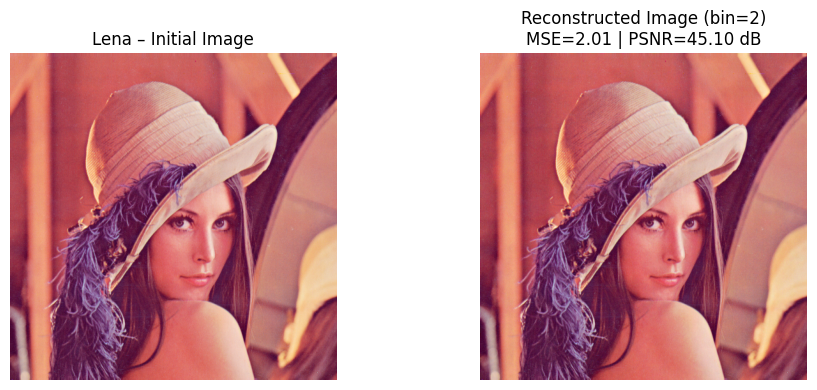


--- Bin size: 10 ---
MSE: 35.4839
PSNR: 32.63 dB


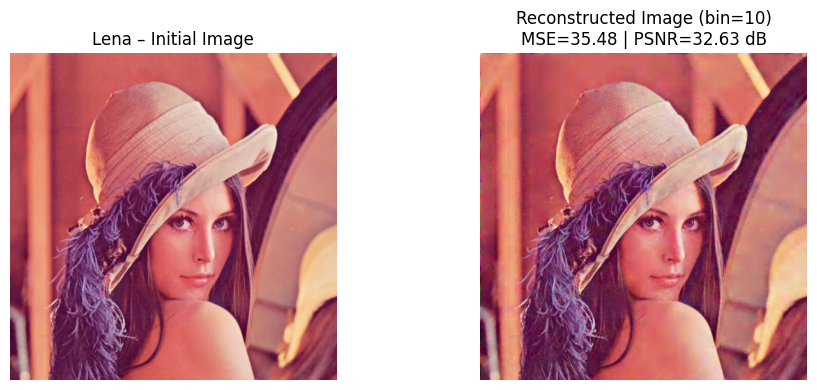


--- Bin size: 25 ---
MSE: 158.4705
PSNR: 26.13 dB


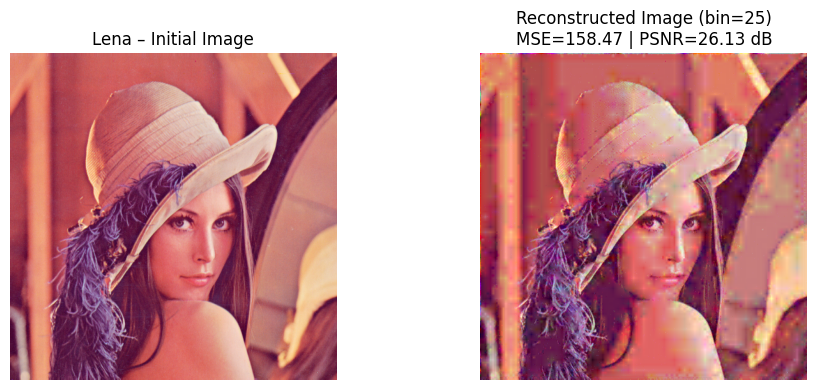


--- Bin size: 50 ---
MSE: 474.4770
PSNR: 21.37 dB


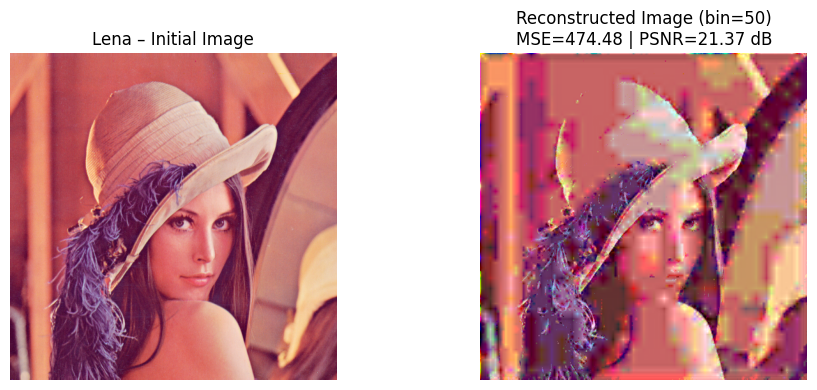


===== Image: Camera =====

--- Bin size: 2 ---
MSE: 1.8132
PSNR: 45.55 dB


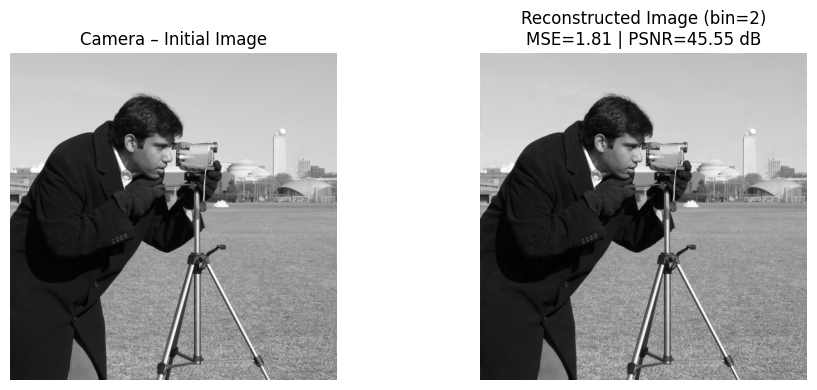


--- Bin size: 10 ---
MSE: 31.1858
PSNR: 33.19 dB


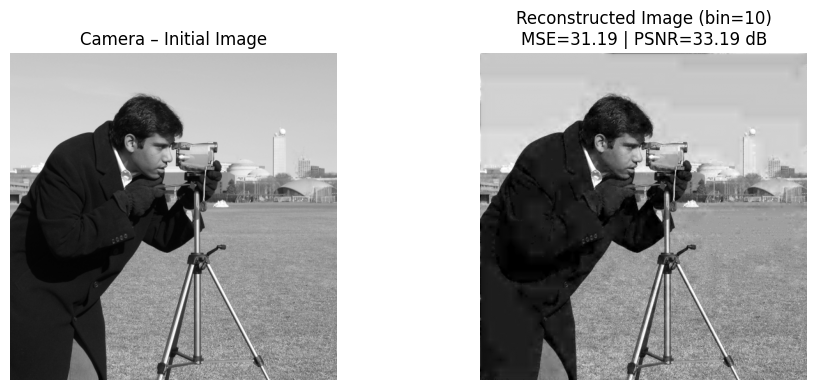


--- Bin size: 25 ---
MSE: 124.7440
PSNR: 27.17 dB


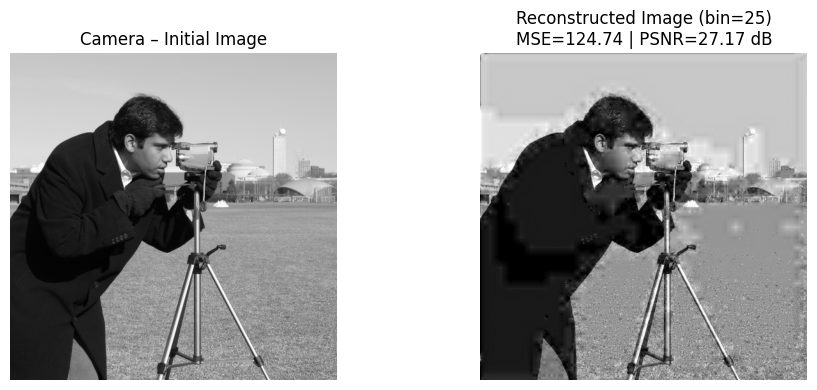


--- Bin size: 50 ---
MSE: 426.6485
PSNR: 21.83 dB


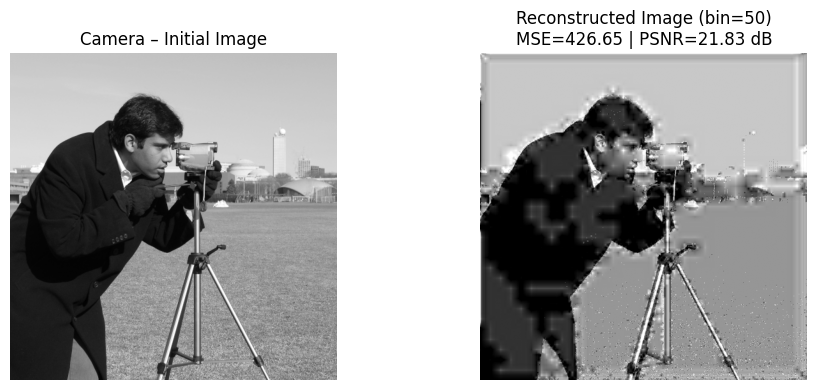

In [143]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio
import matplotlib.pyplot as plt
import numpy as np

# parameter values
alpha = 0.6
depth = 4
bin_sizes = [2, 10, 25, 50]

# make sure images are loaded in float32 form
lena_input = lena.astype(np.float32)
camera_input = camera.astype(np.float32)
images = [("Lena", lena_input), ("Camera", camera_input)]

for name, image in images:
    print(f"\n===== Image: {name} =====")

    for bin_size in bin_sizes:
        print(f"\n--- Bin size: {bin_size} ---")

        # Reconstruction per channel
        if image.ndim == 3:
            reconstructed_channels = []
            for c in range(3):  # RGB
                L = LPyramid(image[:, :, c], alpha, depth)
                L_q = L_Quantization(L, bin_size)
                rec_c = L_Pyramid_Decode(L_q, alpha)
                reconstructed_channels.append(rec_c)
            rec = np.stack(reconstructed_channels, axis=2)
        else:
            L = LPyramid(image, alpha, depth)
            L_q = L_Quantization(L, bin_size)
            rec = L_Pyramid_Decode(L_q, alpha)

        # Clip and covert to uint8
        rec_clipped = np.clip(rec, 0, 255).astype(np.uint8)
        orig_clipped = np.clip(image, 0, 255).astype(np.uint8)

        # MSE & PSNR
        mse = mean_squared_error(orig_clipped, rec_clipped)
        psnr = peak_signal_noise_ratio(orig_clipped, rec_clipped, data_range=255)

        print(f"MSE: {mse:.4f}")
        print(f"PSNR: {psnr:.2f} dB")

        plt.figure(figsize=(10, 4))

        # Initial Image
        plt.subplot(1, 2, 1)
        if orig_clipped.ndim == 2:
            plt.imshow(orig_clipped, cmap='gray')
        else:
            plt.imshow(orig_clipped)
        plt.title(f"{name} – Initial Image")
        plt.axis("off")

        # Reconstructed Image
        plt.subplot(1, 2, 2)
        if rec_clipped.ndim == 2:
            plt.imshow(rec_clipped, cmap='gray')
        else:
            plt.imshow(rec_clipped)
        plt.title(f"Reconstructed Image (bin={bin_size})\nMSE={mse:.2f} | PSNR={psnr:.2f} dB")
        plt.axis("off")

        plt.tight_layout()
        plt.show()


**Παρατηρήσεις:** Από τα παραπάνω αποτελέσματα επιβεβαιώνεται πως η εφαρμογή κβαντοποίησης στην πυραμιδική αναπαράσταση επηρεάζει άμεσα την ποιότητα της ανακατασκευασμένης εικόνας, καθώς εισάγει σφάλματα που αθροίζονται κατά τη διαδικασία αποκωδικοποίησης. Η επιλογή του μεγέθους του bin αποτελεί κρίσιμο παράγοντα: μικρότερα bin sizes διατηρούν μεγαλύτερη ακρίβεια και οδηγούν σε καλύτερη ανακατασκευή, ενώ μεγαλύτερα bin sizes μειώνουν την ακρίβεια της πληροφορίας, αυξάνοντας το σφάλμα και υποβαθμίζοντας την οπτική ποιότητα της εικόνας. Συνεπώς, απαιτείται ισορροπία μεταξύ συμπιεσιμότητας και ποιότητας. Όπως αναφέρεται στο paper, το bin size επιλέγεται ως το μεγαλύτερο δυνατό που δεν προκαλεί αλλοίωση της εικόνας η οποία γίνεται αντιληπτή από το ανθρώπινο μάτι.